In [ ]:
!pip install scikit-dimension
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('./drive')

Mounted at ./drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

In [ ]:
!cp 'drive/MyDrive/optimizer/data/R21.zip' R21.zip

In [ ]:
!unzip R21.zip

Archive:  R21.zip
  inflating: R21.txt                 


In [ ]:
!head R21.txt

5 799 3 3 0
1 1 1
8.609790202442063 22.441607469983119 -13.928269564966532 7.827693735474766 15.709427130183887
1.056165702344254 2.938545305358160 10.716149072903290 13.402131870385183 10.350508105503788
13.295365877422260 25.070622281520230 -12.156149299457269 6.841135462857311 20.696541765341543
6.325127389856043 3.228047587533206 4.322386352483358 17.128691997237560 1.192371520179858
5.959770026040349 9.680134706001393 16.237640747675030 21.215745709141693 13.343760538976476
26.234028498388547 -0.852282195503113 10.977156867504869 5.448596382937815 13.860924860296779
5.476261496679538 24.482235403712664 3.327126550220577 11.829447678426968 27.930757493473713
9.727274421910067 23.679255912046791 -13.635277563402111 8.459411199120400 16.504558601599612


In [ ]:
with open('R21.txt') as fp:
  line = fp.readline()
  line = line.split(' ')
  d, n, m, k, p = [int(item) for item in line]
  line = fp.readline()
  line = line.split(' ')
  K = [int(item) for item in line]


In [ ]:
!tail -n +3 R21.txt > R21_clean.txt

In [ ]:
vectors = np.fromfile('R21_clean.txt', sep=' ').reshape(n, -1)

In [ ]:
vectors

array([[   8.6097902 ,   22.44160747,  -13.92826956,    7.82769374,
          15.70942713],
       [   1.0561657 ,    2.93854531,   10.71614907,   13.40213187,
          10.35050811],
       [  13.29536588,   25.07062228,  -12.1561493 ,    6.84113546,
          20.69654177],
       ...,
       [ 161.52516309,  -10.98391965,   36.60465821,  136.61378231,
        -108.55360635],
       [  94.62586224,   44.25283054,   20.30393486,   97.42876708,
         -11.83669983],
       [ 160.08578473,  -12.21522293,   36.54998102,  137.92230942,
        -107.14536904]])

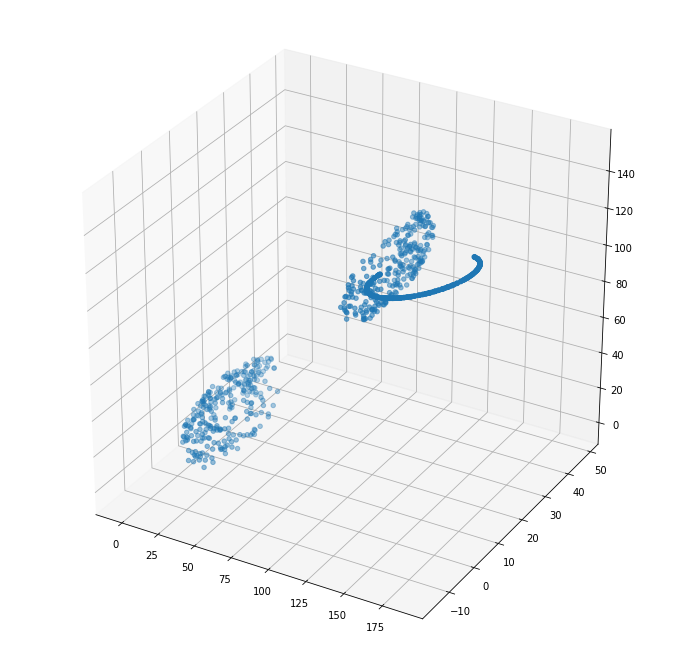

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 3])
_ = plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

gmm = GaussianMixture(n_components=k, covariance_type='diag', 
                      random_state=0, n_init=32, max_iter=10000, tol=1e-6)
gmm.fit(vectors)



GaussianMixture(covariance_type='diag', max_iter=10000, n_components=3,
                n_init=32, random_state=0, tol=1e-06)

In [ ]:
gmm.means_

array([[  13.19910603,   11.99631969,    1.39450557,   15.02389469,
           9.71846969],
       [  95.12598445,   31.59622503,   21.80881273,   89.95231551,
         -16.64063313],
       [ 170.77220482,   -3.83059633,   36.57410145,  137.34506235,
        -101.54318445]])

In [ ]:
def top_k_outliers(vectors, k):
  scores = gmm.score_samples(vectors)
  top_k = np.argpartition(-scores, -k)[-k:]
  return top_k, scores[top_k]

In [ ]:
outlier_ind, _ = top_k_outliers(vectors, p)

In [ ]:
labels = gmm.predict(vectors)
if p > 0:
  labels[outlier_ind] = -1

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1,
       1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       0, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1,

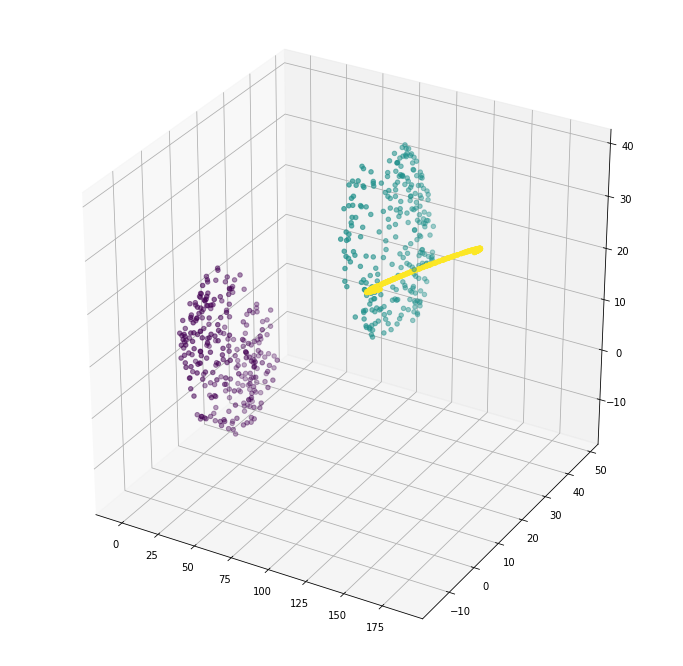

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], c=labels)
_ = plt.show()

In [ ]:
from numba import njit, jit

@jit
def noisy_center_radius(points, k):
  dist_matrix = np.zeros((points.shape[0], points.shape[0]))
  for i in range(points.shape[0]):
    for j in range(i):
      dist = np.linalg.norm(points[i] - points[j])
      dist_matrix[i, j] = dist
  dist_matrix = dist_matrix.reshape(-1)
  top_k_dist = np.argsort(dist_matrix)[-k:]
  rows = top_k_dist // points.shape[0]
  cols = top_k_dist % points.shape[0]
  center = 0.5*(points[cols] + points[rows]).mean(axis=0)
  radius = dist_matrix[top_k_dist].mean()/2
  return center, radius

def center_radius(points):
  dist = torch.cdist(points, points)
  ind = dist.argmax()
  row = (torch.div(ind, points.size(0), rounding_mode='floor')).item()
  col = (ind % points.size(0)).item()
  radius = (dist[row, col]/2).item()
  center = 0.5 * (points[row] + points[col])
  return center, radius


manifold_center = []
manifold_radius = []

for sphere in tqdm(range(k)):
  points = torch.from_numpy(vectors[labels==sphere])
  # points = vectors[labels==sphere]
  center, radius = center_radius(points)
  manifold_center.append(center)
  manifold_radius.append(radius)

manifold_center = np.vstack(manifold_center)

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
gmm.means_

array([[  13.19910603,   11.99631969,    1.39450557,   15.02389469,
           9.71846969],
       [  95.12598445,   31.59622503,   21.80881273,   89.95231551,
         -16.64063313],
       [ 170.77220482,   -3.83059633,   36.57410145,  137.34506235,
        -101.54318445]])

In [ ]:
manifold_radius

[20.231147640463192, 20.237184302867572, 20.238699999811885]

In [ ]:
manifold_center

array([[ 15.13787937,  12.49717048,   1.92499472,  10.9548191 ,
         14.88239339],
       [ 93.71435028,  29.65959526,  22.39498111,  91.08060477,
        -24.42088004],
       [171.70994772,  -3.44772932,  36.39821833, 141.55427337,
        -93.5658481 ]])

In [ ]:
from scipy.optimize import minimize, differential_evolution

@njit
def loss_center_given_radius(center, points, radius):
  # return (((points - center)**2).sum(axis=1) > radius**2).sum()
  return np.linalg.norm(((points - center)**2).sum(axis=1) - radius**2)

@njit
def loss_center_radius(x, points):
  center = x[:-1]
  radius = x[-1]
  return np.linalg.norm(((points - center)**2).sum(axis=1) - radius**2)


@jit
def estimate_corrected_radius(sphere):
  center_b1 = manifold_center[sphere, :] - 2.0
  center_b2 = manifold_center[sphere, :] + 2.0
  # radius_b1 = manifold_radius[sphere] - 0.0
  # radius_b2 = manifold_radius[sphere] + 2.0
  
  bounds = [(center_b1[i], center_b2[i]) for i in range(d)]
  # bounds.append([radius_b1, radius_b2])
  result = differential_evolution(func=loss_center_given_radius,
                        bounds=bounds, maxiter=3000, popsize=128,
                        args=(vectors[labels==sphere], manifold_radius[sphere]),
                        disp=True)
  print(result)
  center = result.x
                        
  return center

In [ ]:
manifold_corrected_desc = np.vstack([estimate_corrected_radius(sphere) for sphere in tqdm(range(m))])

  0%|          | 0/3 [00:00<?, ?it/s]

differential_evolution step 1: f(x)= 117.512
differential_evolution step 2: f(x)= 105.422
differential_evolution step 3: f(x)= 99.2659
differential_evolution step 4: f(x)= 47.0869
differential_evolution step 5: f(x)= 47.0869
differential_evolution step 6: f(x)= 47.0869
differential_evolution step 7: f(x)= 39.8083
differential_evolution step 8: f(x)= 37.1915
differential_evolution step 9: f(x)= 29.217
differential_evolution step 10: f(x)= 19.8206
differential_evolution step 11: f(x)= 19.8206
differential_evolution step 12: f(x)= 19.8206
differential_evolution step 13: f(x)= 19.8206
differential_evolution step 14: f(x)= 16.7323
differential_evolution step 15: f(x)= 16.7323
differential_evolution step 16: f(x)= 16.7323
differential_evolution step 17: f(x)= 16.7323
differential_evolution step 18: f(x)= 16.7323
differential_evolution step 19: f(x)= 6.81011
differential_evolution step 20: f(x)= 6.81011
differential_evolution step 21: f(x)= 6.81011
differential_evolution step 22: f(x)= 6.8101

In [ ]:
manifold_corrected_center = manifold_corrected_desc[:, :]
# manifold_corrected_radius = manifold_corrected_desc[:, -1]
manifold_corrected_center

array([[ 15.59621922,  12.69856162,   2.03639421,  11.07106577,
         15.03670588],
       [ 93.65515705,  29.83978257,  22.47801026,  91.02746546,
        -24.29271075],
       [171.70993732,  -3.44773455,  36.39822063, 141.55423446,
        -93.56592534]])

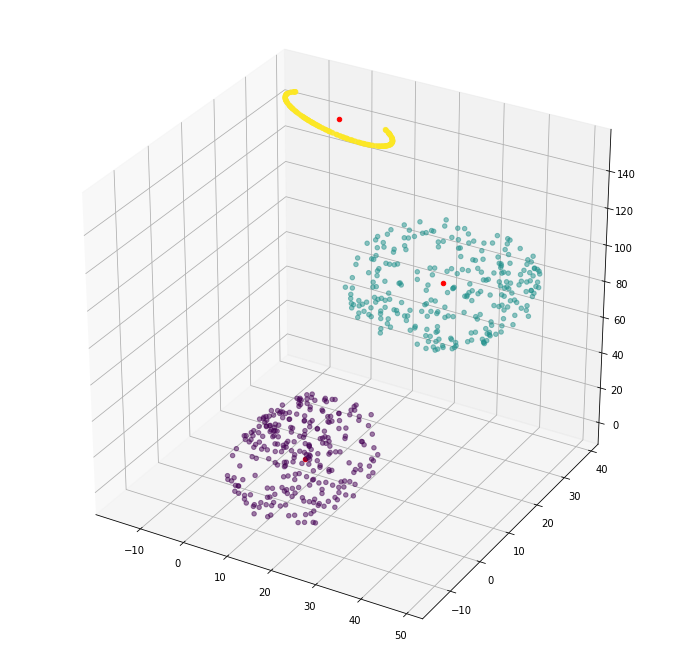

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

# t_colors = (S.flatten().abs() < 0.1).numpy() * 1
# ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], c=t_colors)
ax.scatter(vectors[:, 1], vectors[:, 2], vectors[:, 3], c=labels, alpha=0.5)
for sphere in range(k):
  ax.scatter(manifold_corrected_center[sphere, 1], manifold_corrected_center[sphere, 2], manifold_corrected_center[sphere, 3], c='red')

_ = plt.show()

In [ ]:
import skdim.id as intd

manifold_dims = []

for sphere in tqdm(range(k)):
  lpca = intd.lPCA().fit_pw(vectors[labels==sphere], n_neighbors = 64, n_jobs = 1)
  # pca = intd.DANCo().fit(vectors[labels==sphere])
  # manifold_dims.append(pca.dimension_)
  print(lpca.dimension_pw_)
  manifold_dims.append(int(np.round(lpca.dimension_pw_.mean())))
  

  0%|          | 0/3 [00:00<?, ?it/s]

[4 3 4 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 4 4 4 4 4 4 4 4 4
 4 4 4 4 3 4 4 4 4 4 4 3 4 4 4 3 3 4 4 4 4 4 3 4 4 4 4 3 4 4 3 4 4 4 4 4 3
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 4 4 4 4 4 4 3 4 4 4 4 4 4
 4 4 4 4 4 4 3 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4 4
 4 3 4 4 4 4 4 3 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4
 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 4 4 4 4 4
 4 4 4 4 3 4 4 4 4 3 4 4 4]
[4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3 4 4 3 3
 4 4 4 4 4 3 4 4 4 4 3 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 3
 4 4 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 3 4 4 3 4 4 3 4 4 3 4 4 4 4 4 3 4 3 4 4 4 4 4 4 4 4 4 4
 3 4 4 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3 3 4 4 4

In [ ]:
for sphere in range(m):
  if manifold_dims[sphere] == 1:
    manifold_dims[sphere] = 2

In [ ]:
manifold_dims

[4, 4, 2]

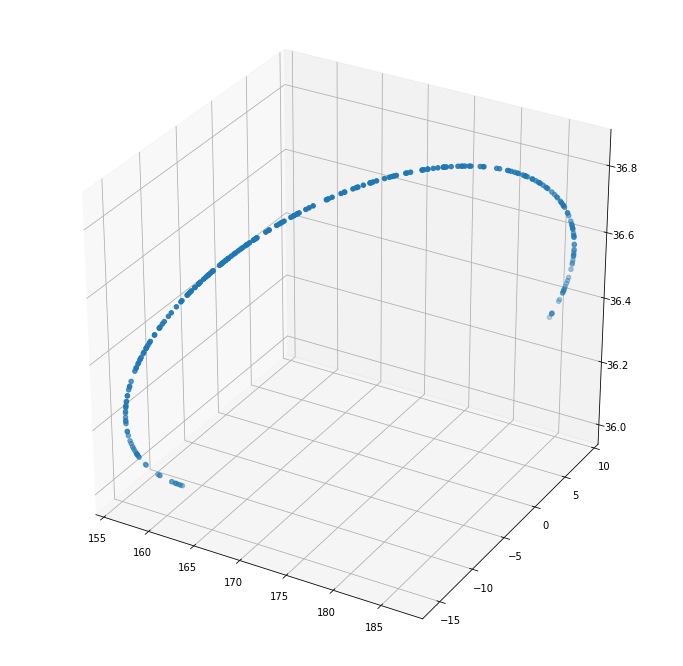

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

S = vectors[labels==2]

ax.scatter(S[:, 0], S[:, 1], S[:, 2])
_ = plt.show()

In [ ]:
manifold_corrected_center

array([[ 15.59621922,  12.69856162,   2.03639421,  11.07106577,
         15.03670588],
       [ 93.65515705,  29.83978257,  22.47801026,  91.02746546,
        -24.29271075],
       [171.70993732,  -3.44773455,  36.39822063, 141.55423446,
        -93.56592534]])

In [ ]:
from numba import njit
from sklearn.decomposition import PCA

@njit
def get_best_fitting_plane_vector(centered, dim):

    # Calculate the covariance matrix of the coordinates
    covariance_matrix = np.cov(centered, rowvar=False) # Variables = columns

    # Calculate the eigenvalues & eigenvectors of the covariance matrix
    e_val, e_vect = np.linalg.eig(covariance_matrix)

    # The normal vector to the plane is the eigenvector associated to the minimum eigenvalue
    min_eval = np.argsort(e_val)[:dim]
    normal_vector = e_vect[:, min_eval]

    return normal_vector

def get_best_fitting_plane_vector_pca(centered, dim):

    pca = PCA(n_components=d)

    pca.fit(centered)

    normal_vector = pca.components_[-dim:]

    return normal_vector.T

In [ ]:
affine_a = []
affine_b = []

for sphere in tqdm(range(k)):
  points = vectors[labels==sphere]
  shift = points.mean(axis=0)
  centered = points - shift
  a = get_best_fitting_plane_vector_pca(centered, d-manifold_dims[sphere])
  b = a.T @ shift
  affine_a.append(a)
  affine_b.append(b)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
affine_a[2]

array([[ 0.36855295, -0.53685543,  0.00409753],
       [-0.10678998,  0.78569527, -0.01554728],
       [-0.01135308,  0.01103429,  0.99963012],
       [ 0.80024684,  0.2815046 ,  0.01768746],
       [-0.46069591, -0.12289265,  0.01297149]])

In [ ]:
affine_a

[array([[ 0.02444488],
        [-0.5246403 ],
        [-0.41879745],
        [ 0.538309  ],
        [ 0.50890778]]), array([[-0.85804246],
        [-0.18853409],
        [-0.43936683],
        [ 0.05892163],
        [ 0.17805354]]), array([[ 0.36855295, -0.53685543,  0.00409753],
        [-0.10678998,  0.78569527, -0.01554728],
        [-0.01135308,  0.01103429,  0.99963012],
        [ 0.80024684,  0.2815046 ,  0.01768746],
        [-0.46069591, -0.12289265,  0.01297149]])]

In [ ]:
with open('output.txt', 'w+') as fp:
  fp.write(f'{n} {k}\n')
  for sphere in range(m):
    fp.write(f'{manifold_dims[sphere]} {K[sphere]} Sphere\n')
    for i in range(affine_a[sphere].shape[1]):
      fp.write(' '.join(affine_a[sphere][:, i].astype(str).tolist()) + '\n')
    fp.write(' '.join(affine_b[sphere].astype(str).tolist()) + '\n')
    vec_ind = np.where(labels == sphere)[0]
    fp.write(' '.join(manifold_corrected_center[sphere, :].astype(str).tolist()) + f' {manifold_radius[sphere]} \n')
    fp.write(f'{len(vec_ind)} ')
    fp.write(' '.join((vec_ind+1).astype(str).tolist()))
    fp.write('\n')
  fp.write(f'{p}')
  if p > 0:
    fp.write(' ' + ' '.join((outlier_ind+1).astype(str).tolist()))